# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [ ]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

In [ ]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("API_KEY_MAPBOX")

## Load Data

In [ ]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [ ]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# Create new dataframe that contains only dwelling types (Drop all other columns)
to_data_filtered = to_data.drop(["neighbourhood","average_house_value","shelter_costs_owned","shelter_costs_rented"], axis=1)

# Create a new dataframe containing the number of dwelling types per year
to_data_filtered_grouped = to_data_filtered.groupby(["year"]).sum()
to_data_filtered_grouped


In [ ]:
# Save the dataframe as a csv file
to_data_filtered_grouped.to_csv("Data/toronto_number of dwelling types per year.csv")

In [ ]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    data.plot.bar(title=title,xlabel=xlabel,ylabel=ylabel,color=color)


In [ ]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001 using the create_bar function
create_bar_chart(
    data = to_data_filtered_grouped.iloc[0],
    title = "Dwelling Types in Toronto 2001",
    xlabel = "2001",
    ylabel = "Dwelling Type Units",
    color = "red"
)

In [ ]:
# Bar chart for 2006 using the create_bar function
create_bar_chart(
    data = to_data_filtered_grouped.iloc[1],
    title = "Dwelling Types in Toronto 2006",
    xlabel = "2006",
    ylabel = "Dwelling Type Units",
    color = "blue"
)

In [ ]:
# Bar chart for 2011 using the create_bar function
create_bar_chart(
    data = to_data_filtered_grouped.iloc[2],
    title = "Dwelling Types in Toronto 2011",
    xlabel = "2011",
    ylabel = "Dwelling Type Units",
    color = "orange"
)

In [ ]:
# Bar chart for 2016 using the create_bar function
create_bar_chart(
    data = to_data_filtered_grouped.iloc[3],
    title = "Dwelling Types in Toronto 2016",
    xlabel = "2016",
    ylabel = "Dwelling Type Units",
    color = "magenta"
)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [349]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# Create new dataframe that contains only owned and rented dwellings (Drop all other columns)
to_data_owned_rented = to_data.drop(["neighbourhood","single_detached_house","apartment_five_storeys_plus","movable_dwelling","semi_detached_house","row_house","duplex","apartment_five_storeys_less","other_house","average_house_value"], axis=1)

# Create a new dataframe containing owned and rented dwellings types per year with the mean costs for each
to_data_owned_rented_grouped = to_data_owned_rented.groupby(["year"]).mean()
to_data_owned_rented_grouped

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [350]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    data.plot(title=title,xlabel=xlabel,ylabel=ylabel,color=color) 

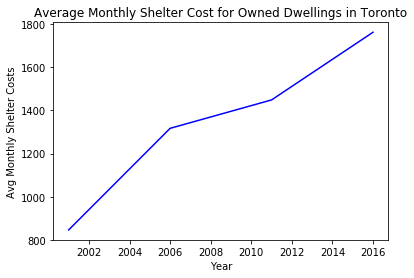

In [351]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(
    data = to_data_owned_rented_grouped["shelter_costs_owned"],
    title = "Average Monthly Shelter Cost for Owned Dwellings in Toronto",
    xlabel = "Year",
    ylabel = "Avg Monthly Shelter Costs",
    color = "blue"
)

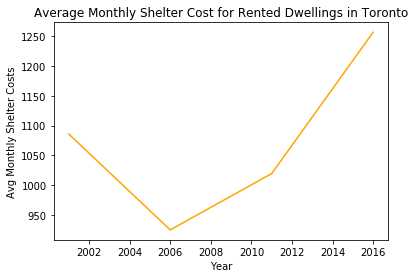

In [352]:
# Line chart for rented dwellings
create_line_chart(
    data = to_data_owned_rented_grouped["shelter_costs_rented"],
    title = "Average Monthly Shelter Cost for Rented Dwellings in Toronto",
    xlabel = "Year",
    ylabel = "Avg Monthly Shelter Costs",
    color = "orange"
)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [353]:
# Calculate the average house value per year
# Create a new dataframe containing just the average_house_value data
to_data_avg_house_values = to_data["average_house_value"]
# Create a new dataframe containing average house value per year with the mean costs for each
average_house_value = to_data_avg_house_values.groupby(["year"]).mean()

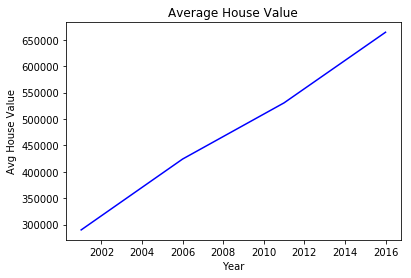

In [354]:
# Plot the average house value per year as a line chart
create_line_chart(
    data = average_house_value,
    title = "Average House Value",
    xlabel = "Year",
    ylabel = "Avg House Value",
    color = "blue"
)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [355]:
# Create a new DataFrame with the mean house values by neighbourhood per year
# Create a new Dataframe with multi index of neighbourhood and year with only mean values
avg_price_by_neighbourhood =  to_data.groupby(by=["neighbourhood", "year"]).mean()

# Create a new Dataframe with multi index of neighbourhood and year and select only the average house value
avg_house_price_by_neighbourhood = avg_price_by_neighbourhood.drop(["single_detached_house","apartment_five_storeys_plus","movable_dwelling","semi_detached_house","row_house","duplex","apartment_five_storeys_less","other_house","shelter_costs_owned","shelter_costs_rented"], axis=1)


In [357]:
test.hvplot(
    x='year', 
    y='average_house_value', 
    xlabel = 'Year', 
    ylabel = 'Average House Value',
    yformatter="%.0f",
    groupby="neighbourhood",
    widget_location='right_top'
)

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] VSpacer()

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [ ]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE!

In [ ]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [ ]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

In [ ]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [ ]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [ ]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

In [ ]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [ ]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [ ]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [ ]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [ ]:
# Create the sunburst chart
# YOUR CODE HERE!